# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook

plt.rcParams["figure.figsize"] = (9,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni


In [11]:
df.rename(columns={column : column.lower() for column in df.columns}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             900 non-null    int64  
 1   majoraxislength  900 non-null    float64
 2   minoraxislength  900 non-null    float64
 3   eccentricity     900 non-null    float64
 4   convexarea       900 non-null    int64  
 5   extent           900 non-null    float64
 6   perimeter        900 non-null    float64
 7   class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
majoraxislength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
minoraxislength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
convexarea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [14]:
df.isnull().sum()

area               0
majoraxislength    0
minoraxislength    0
eccentricity       0
convexarea         0
extent             0
perimeter          0
class              0
dtype: int64

In [15]:
df.columns

Index(['area', 'majoraxislength', 'minoraxislength', 'eccentricity',
       'convexarea', 'extent', 'perimeter', 'class'],
      dtype='object')

In [16]:
df["class"].value_counts()

# Balanced Data

class
Kecimen    450
Besni      450
Name: count, dtype: int64

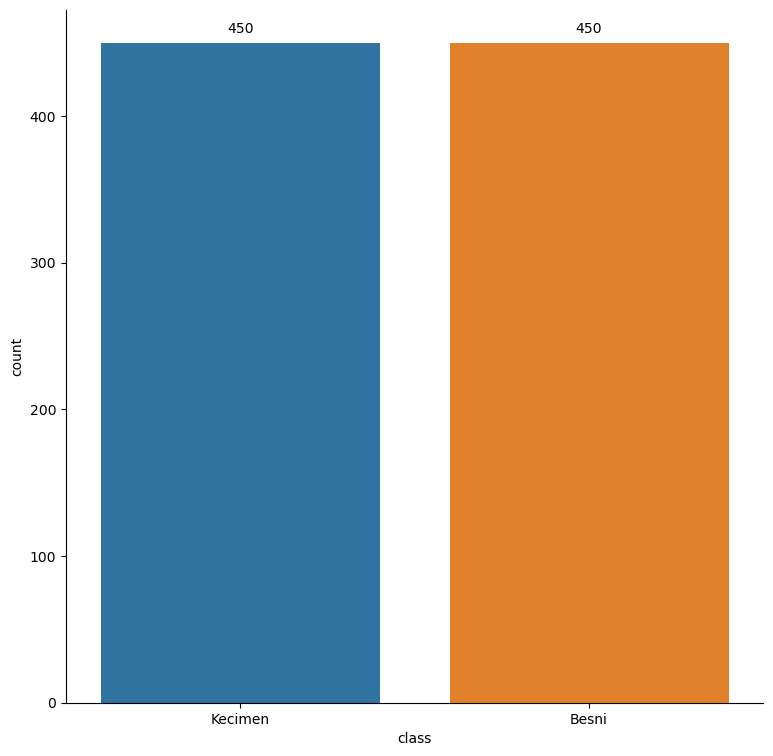

In [17]:
ax = sns.countplot(x=df["class"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [42]:
df["class"] = df["class"].map({"Kecimen":0,"Besni":1})

# mapping Kecimen as 0, Besni as 1

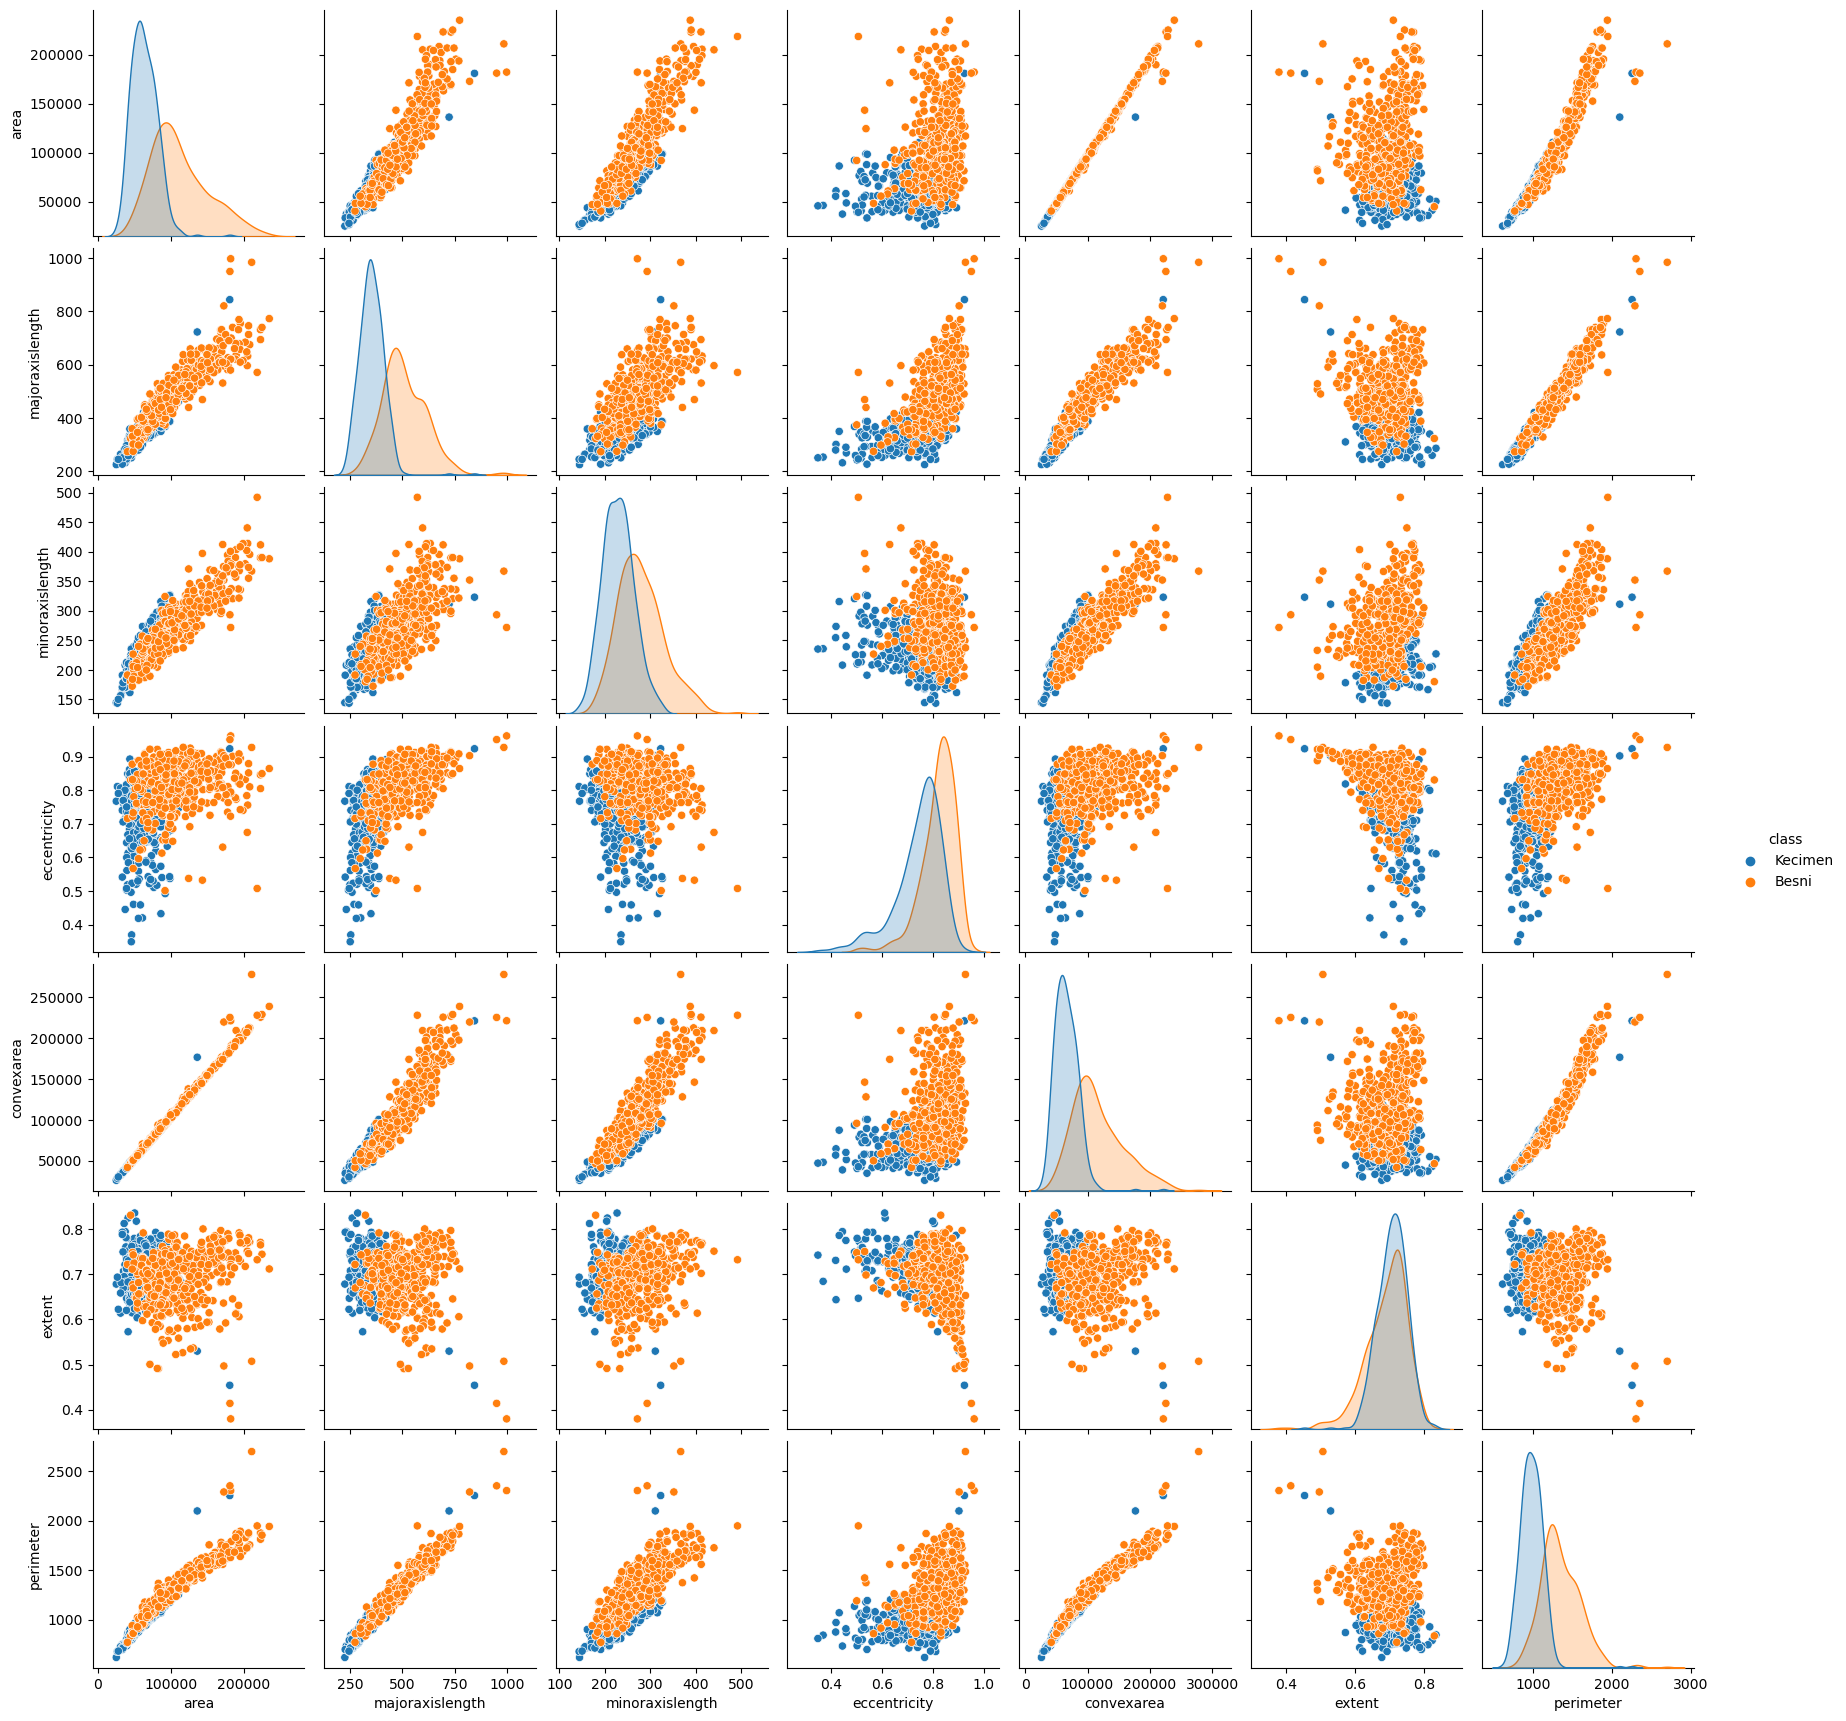

In [18]:
sns.pairplot(data=df, hue="class");

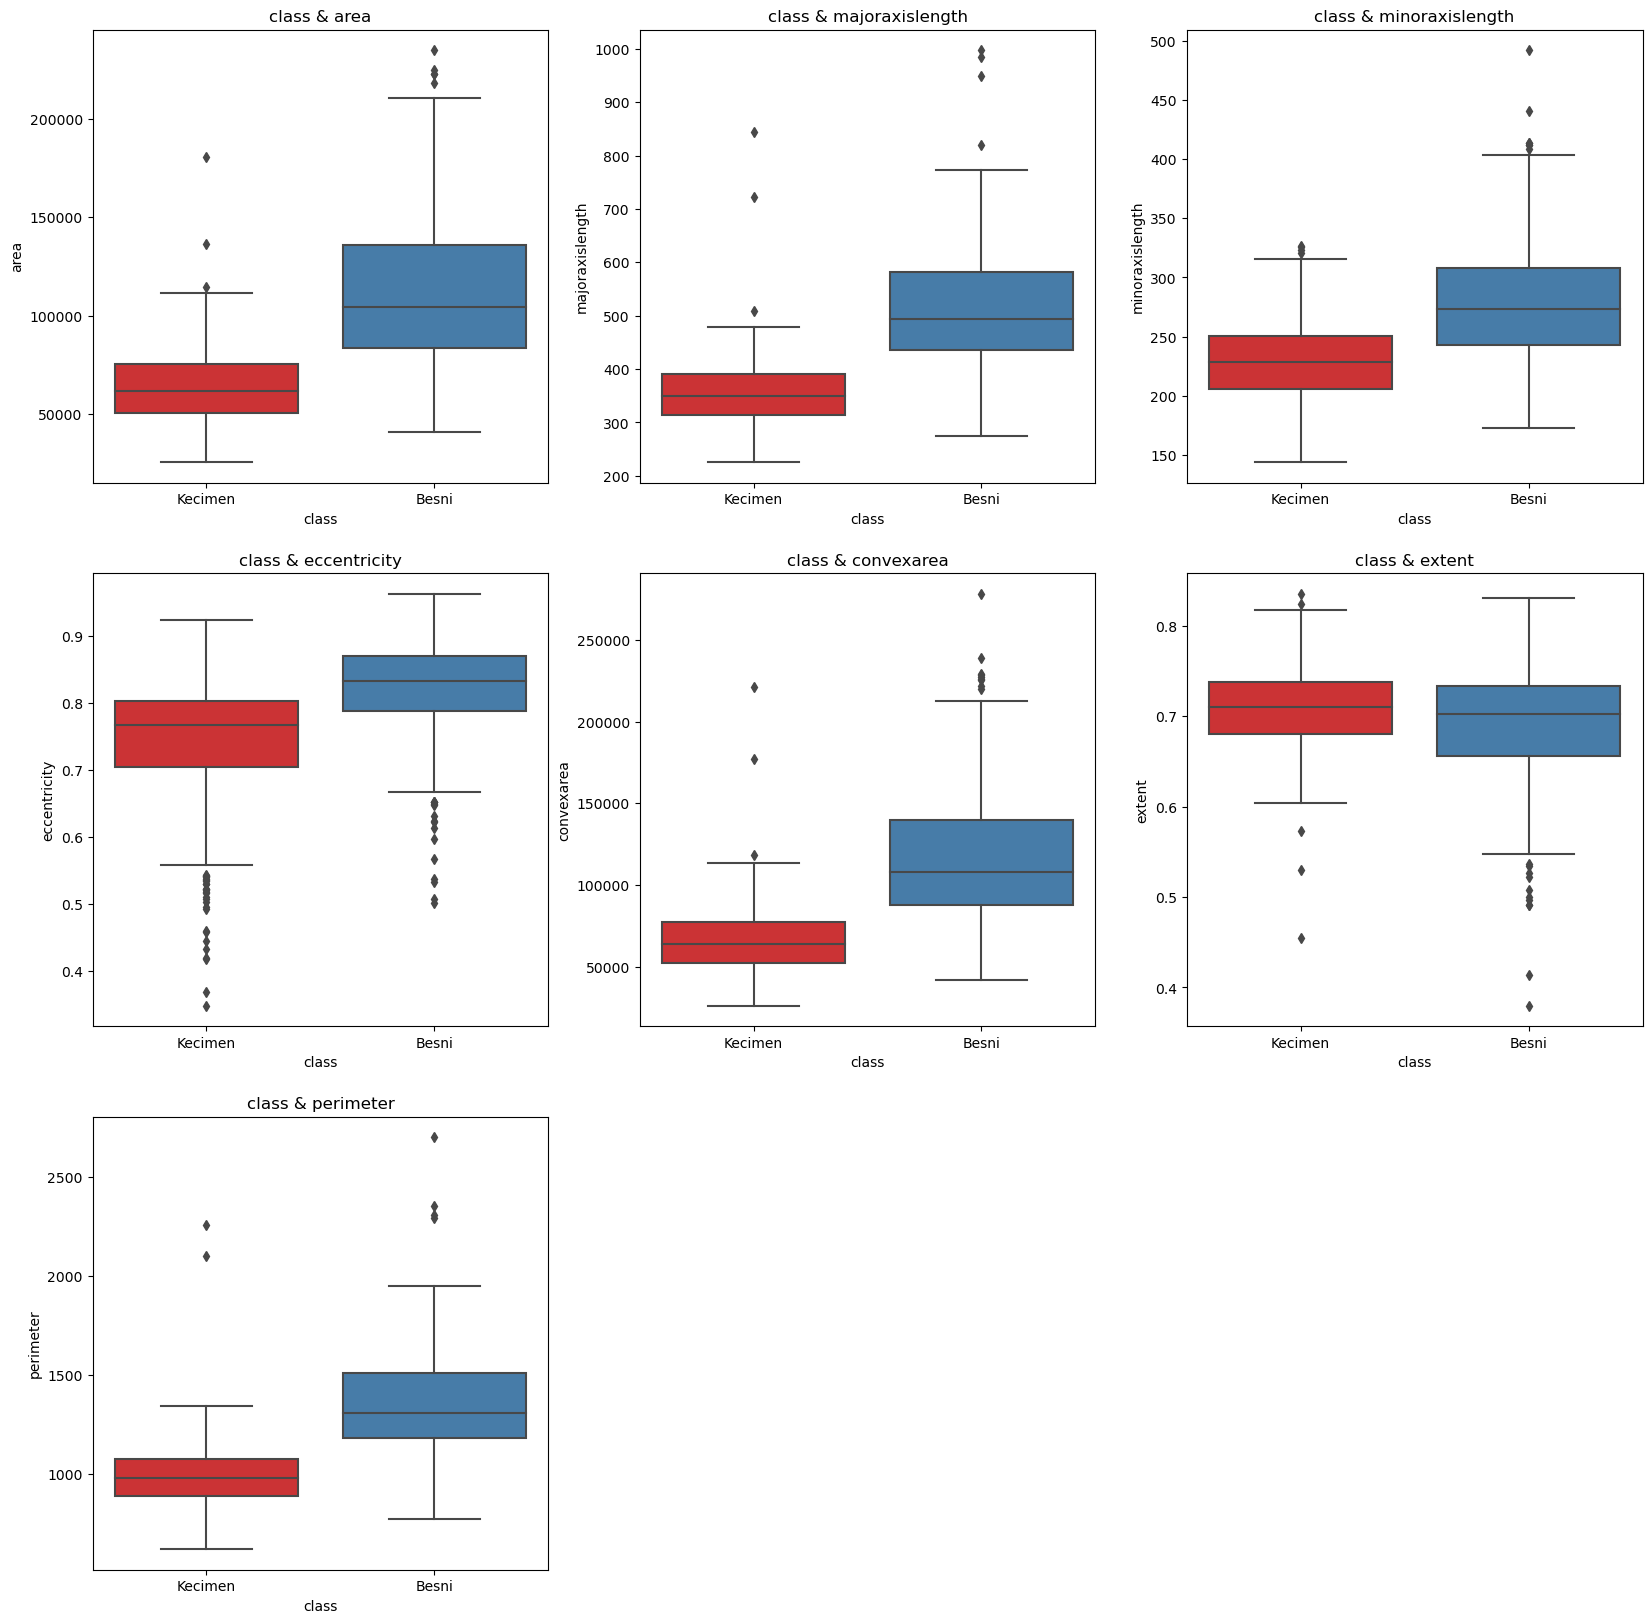

In [27]:
index = 0
plt.figure(figsize=(20,20))
for column in df.columns:
    if column != "class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='class',y=column, data=df, palette='Set1')
        plt.title(f'class & {column}')
plt.show()

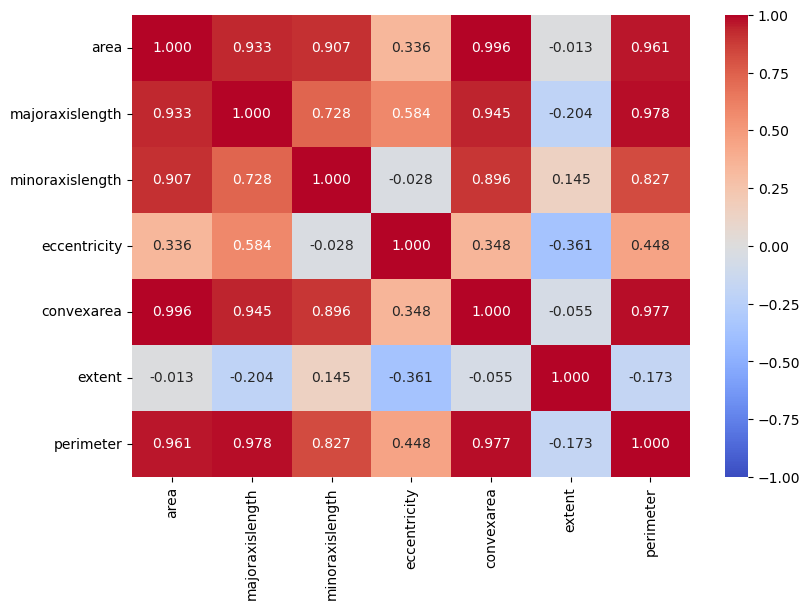

In [36]:
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, fmt='.3f', cmap='coolwarm');

In [34]:
multiCorr = df.select_dtypes("number").corr()
print(multiCorr.shape)
multiCorr = multiCorr.loc[((multiCorr > .89) & (multiCorr < 1)).any(axis=1),
                          ((multiCorr > .89) & (multiCorr < 1)).any()]
print(multiCorr.shape)

(7, 7)
(5, 5)


In [35]:
multiCorr.style.set_properties(
    color="#00cc00", **{
        "background-color": "#00ff00"
    }
).applymap(
    lambda v:
    "font-size:25px; color:green; selector:td:hover, props:[(color, yellow)}"
    if v > .89 and v < 1 else "background-color:#370073").set_table_styles([{
        "selector":
        "td:hover",
        "props": [("color", "#9c337f"), ("font-size", "23px"),
                  ("font-weight", "bold")]
    }, {
        "selector":
        "th:hover",
        "props": [("color", "#9c337f"), ("font-weight", "bold")]
    }])

,area,majoraxislength,minoraxislength,convexarea,perimeter
area,1.000000,0.932774,0.906650,0.995920,0.961352
majoraxislength,0.932774,1.000000,0.728030,0.945031,0.977978
minoraxislength,0.906650,0.728030,1.000000,0.895651,0.827417
convexarea,0.995920,0.945031,0.895651,1.000000,0.976612
perimeter,0.961352,0.977978,0.827417,0.976612,1.000000


## Train | Test Split and Scaling

In [29]:
!pip install iplotx

ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot


# Logistic Regression

## Model Performance

### Cross Validate

### GridSearchCV

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

# Conclusion 